In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense,Flatten,Embedding,Conv2D,MaxPool2D,Bidirectional,LSTM,GRU
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import pandas as pd
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
import cv2
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import urllib.request
import zipfile
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,RMSprop

In [1]:
pip install torch==1.10.0+cu102 torchvision==0.11.1+cu102 torchaudio===0.10.0+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.htmlNote: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: torch
    Found existing installation: torch 1.8.1
    Uninstalling torch-1.8.1:
      Successfully uninstalled torch-1.8.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.9.1
    Uninstalling torchvision-0.9.1:
      Successfully uninstalled torchvision-0.9.1
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.8.0
    Uninstalling torchaudio-0.8.0:
      Successfully uninstalled torchaudio-0.8.0


In [1]:
pip install --upgrade tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires grpcio<2.0,>=1.37.0, but you have grpcio 1.34.1 which is incompatible.
You should consider upgrading via the 'C:\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.1
    Uninstalling tensorflow-2.5.1:
      Successfully uninstalled tensorflow-2.5.1


In [38]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 74 bytes


In [39]:
! kaggle datasets download -d cashutosh/gender-classification-dataset

gender-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
a='./gender-classification-dataset.zip'
b=zipfile.ZipFile(a,'r')
b.extractall('./gender')
b.close()

In [41]:
train_dataset=ImageDataGenerator(rescale=1/255)
validation_dataset=ImageDataGenerator(rescale=1/255)

train=train_dataset.flow_from_directory('/content/gender/Training',
                                        target_size=(300,300),
                                        batch_size=20,
                                        class_mode='binary')
validation=validation_dataset.flow_from_directory('/content/gender/Validation',target_size=(300,300),class_mode='binary')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [42]:
model=Sequential([Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                  MaxPooling2D(2,2),
                  Conv2D(32,(3,3),activation='relu'),
                  MaxPooling2D(2,2),
                  Conv2D(64,(3,3),activation='relu'),
                  MaxPooling2D(2,2),
                  Conv2D(64,(3,3),activation='relu'),
                  MaxPooling2D(2,2),
                  Conv2D(64,(3,3),activation='relu'),
                  MaxPooling2D(2,2),
                  Flatten(),
                  Dense(512,activation='relu'),
                  Dense(1,activation='sigmoid')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [43]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])



In [44]:
class call(Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.99):
      self.model.stop_training=True


x=call()

In [45]:
a=model.fit(train,epochs=8,validation_data=validation,validation_steps=8,verbose=1,callbacks=x)

Epoch 1/8
2351/2351 [==============================] - 158s 67ms/step - loss: 0.2636 - accuracy: 0.8901 - val_loss: 0.1905 - val_accuracy: 0.9414
Epoch 2/8
2351/2351 [==============================] - 155s 66ms/step - loss: 0.1699 - accuracy: 0.9414 - val_loss: 0.2008 - val_accuracy: 0.9492
Epoch 3/8
2351/2351 [==============================] - 155s 66ms/step - loss: 0.1609 - accuracy: 0.9452 - val_loss: 0.0591 - val_accuracy: 0.9727
Epoch 4/8
2351/2351 [==============================] - 155s 66ms/step - loss: 0.1588 - accuracy: 0.9469 - val_loss: 0.0793 - val_accuracy: 0.9688
Epoch 5/8
2351/2351 [==============================] - 154s 66ms/step - loss: 0.1598 - accuracy: 0.9468 - val_loss: 0.1388 - val_accuracy: 0.9414
Epoch 6/8
2351/2351 [==============================] - 156s 66ms/step - loss: 0.1543 - accuracy: 0.9480 - val_loss: 0.1865 - val_accuracy: 0.9531
Epoch 7/8
2351/2351 [==============================] - 155s 66ms/step - loss: 0.1599 - accuracy: 0.9495 - val_loss: 0.1685 -

In [46]:
model.save('male-or-female-classifier.h5')

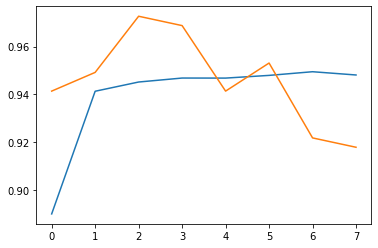

In [47]:
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])

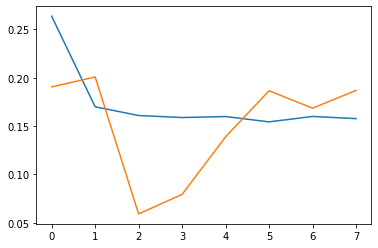

In [48]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])

In [58]:
import numpy as np
from google.colab import files
from keras.preprocessing import image


for i in uploaded.keys():
  path='/isolated-shot-young-handsome-male-260nw-762790210.jpg'
  img = image.load_img(path, target_size=(300, 300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=20)
  print(classes[0])
  if classes[0]>0.5:
    print(i + " is a female")
  else:
    print(i + " is a male")


[1.]
kaggle.json is a female
